In [1]:
# This script is about pioneer sensing to get priori knowledge of the environment, especially the noise level.

Mean of X: 0.025699473431094817, Standard Deviation of X: 0.003207756854759442
Mean of Y: -0.016015707547075486, Standard Deviation of Y: 0.0032428331468619836
Mean of Z: 0.9993925062389601, Standard Deviation of Z: 0.0053374192834706536


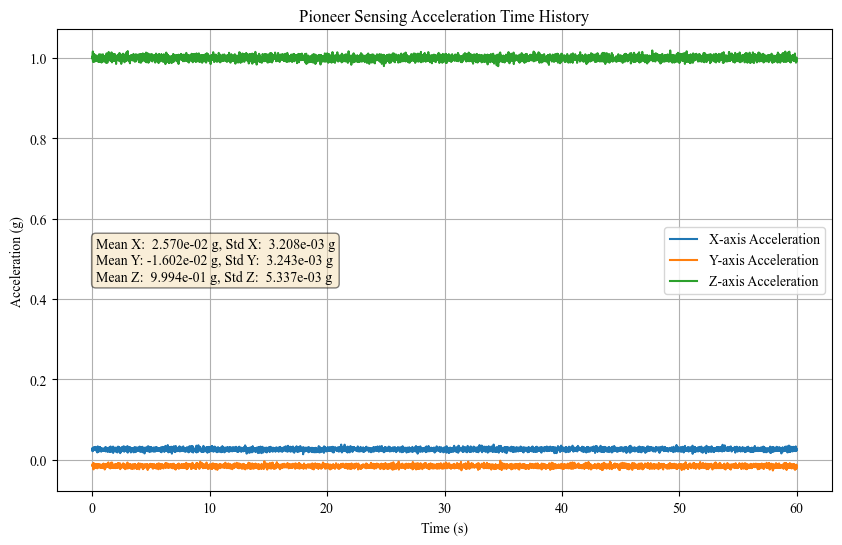

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('pioneer-sensing.csv', header=None, names=['x', 'y', 'z'])

# Calculate the mean and standard deviation for each column
mean_x = data['x'].mean()
std_x = data['x'].std()
mean_y = data['y'].mean()
std_y = data['y'].std()
mean_z = data['z'].mean()
std_z = data['z'].std()

# Print the mean and standard deviation
print(f"Mean of X: {mean_x}, Standard Deviation of X: {std_x}")
print(f"Mean of Y: {mean_y}, Standard Deviation of Y: {std_y}")
print(f"Mean of Z: {mean_z}, Standard Deviation of Z: {std_z}")

# Set the font to Times New Roman
plt.rc('font', family='Times New Roman')

# Create a time axis (in seconds)
time = [i * 0.01 for i in range(len(data))]  # Sampling interval is 10ms (0.01s)

# Plot the three columns of data
plt.figure(figsize=(10, 6))
plt.plot(time, data['x'], label='X-axis Acceleration')
plt.plot(time, data['y'], label='Y-axis Acceleration')
plt.plot(time, data['z'], label='Z-axis Acceleration')

# Add legend and labels
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.title('Pioneer Sensing Acceleration Time History')

# Display the mean and standard deviation using scientific notation (3 decimal places)
textstr = '\n'.join((
    f'Mean X: {"{:.3e}".format(mean_x):>10} g, Std X: {"{:.3e}".format(std_x):>10} g',
    f'Mean Y: {"{:.3e}".format(mean_y):>10} g, Std Y: {"{:.3e}".format(std_y):>10} g',
    f'Mean Z: {"{:.3e}".format(mean_z):>10} g, Std Z: {"{:.3e}".format(std_z):>10} g'))

# Place the text box with the statistics on the plot (position adjusted for visibility)
plt.text(0.05, 0.55, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Add grid
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('Pioneer Sensing Acceleration Time History.png', dpi=300)

# Show the plot
plt.show()


Mean of Y: -0.016015707547075486, Standard Deviation of Y: 0.0032428331468619836


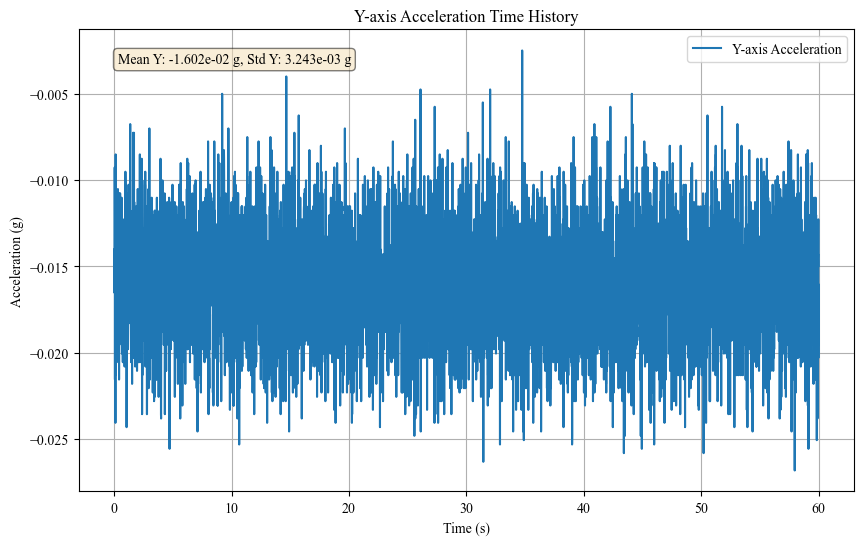

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file and select the second column (y-axis acceleration data)
data = pd.read_csv('pioneer-sensing.csv', header=None, names=['x', 'y', 'z'])
y_data = data['y']  # Select the second column

# Create a time axis (in seconds)
time = [i * 0.01 for i in range(len(y_data))]  # Sampling interval is 10ms (0.01s)

# Calculate the mean and standard deviation for the second column
mean_y = y_data.mean()
std_y = y_data.std()

# Print the mean and standard deviation
print(f"Mean of Y: {mean_y}, Standard Deviation of Y: {std_y}")

# Set the font to Times New Roman
plt.rc('font', family='Times New Roman')

# Plot the second column of data
plt.figure(figsize=(10, 6))
plt.plot(time, y_data, label='Y-axis Acceleration')

# Add legend and labels
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.title('Y-axis Acceleration Time History')

# Display the mean and standard deviation using scientific notation (3 decimal places)
textstr = f'Mean Y: {mean_y:.3e} g, Std Y: {std_y:.3e} g'

# Place the text box with the statistics on the plot (position adjusted for visibility)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Add grid
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('Y-axis Acceleration Time History.png', dpi=300)

# Show the plot
plt.show()


In [4]:
# check the min and max values of the data (absolute values)
x = data['x'] - mean_x
y = data['y'] - mean_y
z = data['z'] - mean_z

min_x = x.abs().min()
max_x = x.abs().max()

min_y = y.abs().min()
max_y = y.abs().max()

min_z = z.abs().min()
max_z = z.abs().max()

print(f"Min X: {min_x}, Max X: {max_x}")
print(f"Min Y: {min_y}, Max Y: {max_y}")
print(f"Min Z: {min_z}, Max Z: {max_z}")

Min X: 0.0001211865689051822, Max X: 0.012162433431094816
Min Y: 2.8202452924515342e-05, Max Y: 0.013508847547075487
Min Z: 9.263376103985088e-05, Max Z: 0.020212886238960115


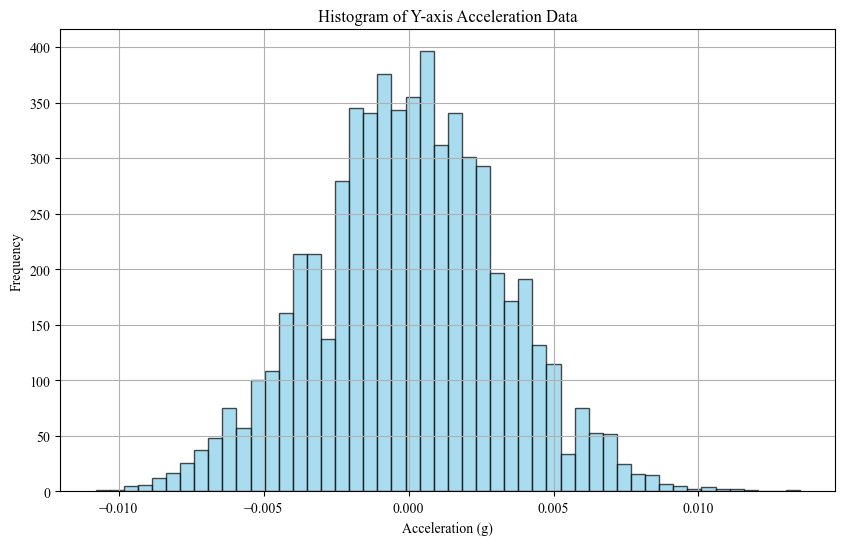

In [5]:
# plot the histogram of y-axis acceleration data
plt.figure(figsize=(10, 6))
plt.hist(y, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Acceleration (g)')
plt.ylabel('Frequency')
plt.title('Histogram of Y-axis Acceleration Data')
plt.grid(True)
plt.show()

In [6]:
import numpy as np

# Method 1: Assuming the data follows a normal distribution
# Calculate the mean and standard deviation
mean = np.mean(y)
std = np.std(y)
# For a normal distribution, about 99.73% of data lies within ±3 standard deviations from the mean
lower_bound_normal = mean - 3 * std
upper_bound_normal = mean + 3 * std

print("Assuming normal distribution:")
print("Lower bound: {:.4f}".format(lower_bound_normal))
print("Upper bound: {:.4f}".format(upper_bound_normal))

# Method 2: Using the quantile method without assuming any specific distribution
# To cover 99.73% of the data, the remaining 0.27% is split between both tails,
# with each tail accounting for 0.135%. Thus, we compute the 0.135th and 99.865th percentiles.
lower_bound_quantile = np.percentile(y, 0.135)
upper_bound_quantile = np.percentile(y, 99.865)

print("\nUsing quantile method (non-parametric):")
print("Lower bound: {:.4f}".format(lower_bound_quantile))
print("Upper bound: {:.4f}".format(upper_bound_quantile))


Assuming normal distribution:
Lower bound: -0.0097
Upper bound: 0.0097

Using quantile method (non-parametric):
Lower bound: -0.0093
Upper bound: 0.0102
